In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature, NaturalEarthFeature

ModuleNotFoundError: No module named 'NaturalEarthFeature'

In [2]:
pos_data = pd.read_csv('./a.danger_forecasting/positives.csv')
neg_data = pd.read_csv('./a.danger_forecasting/negatives.csv')

In [3]:
max_wspeed = pos_data['wind_speed'].max()
min_wspeed = pos_data['wind_speed'].min()
print(max_wspeed, "minimum:", min_wspeed)

15.19773 minimum: 0.5327648


In [35]:
neg_data.columns

Index(['time', 'aspect', 'burned_areas', 'curvature', 'd2m', 'dem',
       'ignition_points', 'lai', 'lst_day', 'lst_night', 'ndvi', 'rh',
       'roads_distance', 'slope', 'smi', 'sp', 'ssrd', 't2m', 'tp',
       'wind_direction', 'wind_speed', 'x', 'y', 'lc_agriculture', 'lc_forest',
       'lc_grassland', 'lc_settlement', 'lc_shrubland', 'lc_sparse_vegetation',
       'lc_water_bodies', 'lc_wetland', 'population', 'burned_area_has',
       'time_idx', 'sample'],
      dtype='object')

In [5]:
pos_data[pos_data['time_idx'] == 0]

,time,aspect,burned_areas,curvature,d2m,dem,ignition_points,lai,lst_day,lst_night,...,lc_grassland,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,population,burned_area_has,time_idx,sample
0,2006-07-29,182.778200,0.0,-1469.686900,289.78036,142.89676,0.0,0.5,321.16000,295.52,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.203210,40.0,0,0
30,2006-08-01,251.970410,0.0,7917.309600,287.56638,725.28230,0.0,0.8,310.75998,292.72,...,0.000000,0.00000,0.467872,0.000000,0.023528,0.0,5.054824,98.0,0,1
60,2006-05-15,250.553280,0.0,1964.971900,286.77570,610.15280,0.0,1.4,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,2.285598,256.0,0,2
90,2006-07-22,298.947780,0.0,70075.250000,283.35565,1186.66810,0.0,0.4,315.60000,299.18,...,0.000000,0.00000,0.709402,0.143565,0.000000,0.0,34.967278,644.0,0,3
120,2006-07-09,2.503906,0.0,2555.639600,289.07460,611.20245,0.0,0.5,316.10000,296.44,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,106.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257070,2014-02-21,164.327650,0.0,-16048.169000,279.17194,514.64764,0.0,0.3,NaN,278.08,...,0.022091,0.00000,0.122798,0.109686,0.000000,0.0,4.264875,58.0,0,8569
257100,2014-02-23,62.683590,0.0,-32704.113000,280.37936,805.21783,0.0,0.3,289.63998,275.66,...,0.000000,0.00000,1.000000,0.000000,0.000000,0.0,6.417916,4127.0,0,8570
257130,2010-06-13,171.238590,0.0,-2828.906200,282.30676,1502.72190,0.0,1.0,NaN,284.22,...,0.000000,0.00000,0.481616,0.000000,0.000000,0.0,13.944526,118.0,0,8571
257160,2014-07-04,46.000572,0.0,16962.354000,285.75995,1717.85070,0.0,0.5,310.10000,289.16,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,5.994393,96.0,0,8572


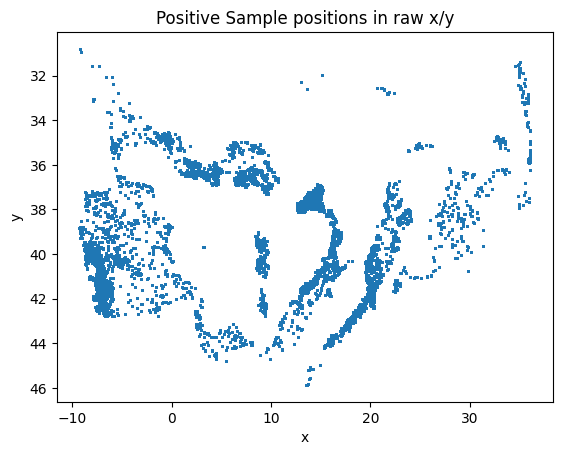

In [6]:
plt.scatter(pos_data['x'], pos_data['y'], s=1)
plt.title("Positive Sample positions in raw x/y")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().invert_yaxis()  # Wenn Bildkoordinaten (0 oben)
plt.show()

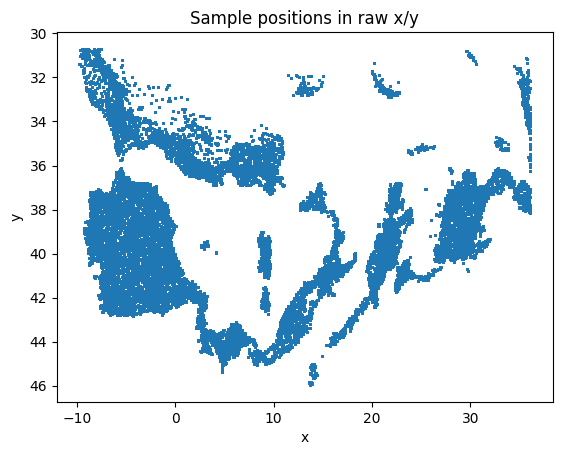

In [7]:
plt.scatter(neg_data['x'], neg_data['y'], s=1)
plt.title("Sample positions in raw x/y")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().invert_yaxis()  # Wenn Bildkoordinaten (0 oben)
plt.show()

### Plot der positiven Proben mit Cartopy

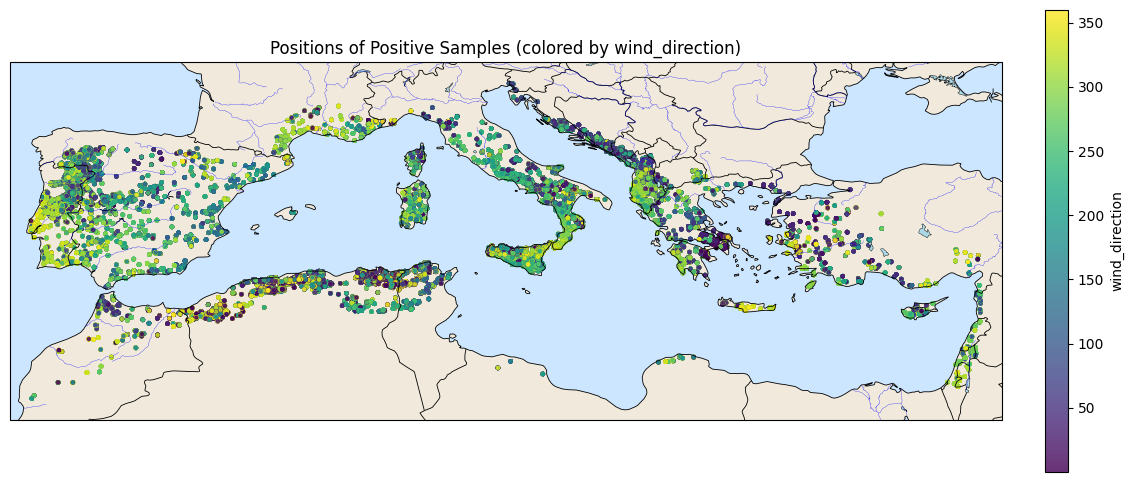

In [33]:

x = pos_data['x']
y = pos_data['y']
influence_variable = pos_data['wind_direction']

# Plot mit Cartopy
fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([x.min() - 1, x.max() + 1, y.min() - 1, y.max() + 1], crs=ccrs.PlateCarree())
#ax.stock_img()

# Features hinzufügen
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#f0e9dc')  # Sandfarben
ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor='#cce6ff')  # Hellblau
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.6)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.6)
ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='lightblue', edgecolor='k', linewidth=0.3)
ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='blue', linewidth=0.2)

# Scatter mit Farbe nach Population
sc = ax.scatter(x, y, c=influence_variable, cmap='viridis', s=5, alpha=0.8, vmin=influence_variable.min(), vmax=influence_variable.max(), transform=ccrs.PlateCarree())

# Farbskala
cb = plt.colorbar(sc, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cb.set_label(f'{influence_variable.name}')

# Titel
plt.title(f"Positions of Positive Samples (colored by {influence_variable.name})")

plt.show()

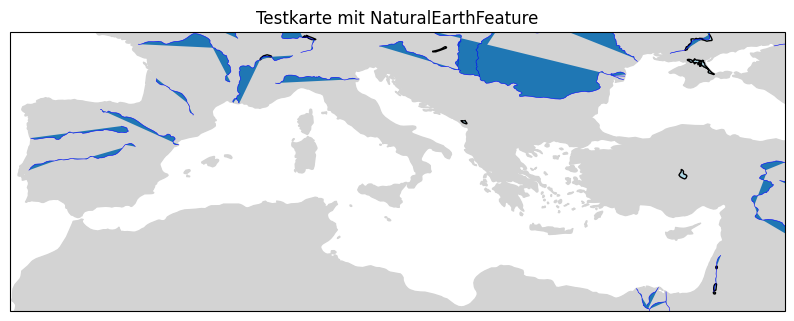

In [45]:
ignition_dates = pos_data[pos_data['time_idx'] == 0]
sum_ignition = ignition_dates['time'].count()
sum_ignition

np.int64(8574)

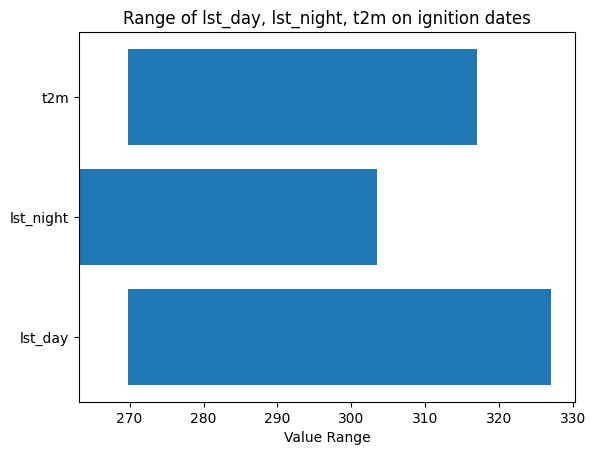

In [28]:
# Range (Min & Max) berechnen
lst_day_min, lst_day_max = ignition_dates['lst_day'].min(), ignition_dates['lst_day'].max()
lst_night_min, lst_night_max = ignition_dates['lst_night'].min(), ignition_dates['lst_night'].max()
t2m_min, t2m_max = ignition_dates['t2m'].min(), ignition_dates['t2m'].max()

# Plot vorbereiten
variables = ['lst_day', 'lst_night', 't2m']
mins = [lst_day_min, lst_night_min, t2m_min]
maxs = [lst_day_max, lst_night_max, t2m_max]
ranges = [max_val - min_val for min_val, max_val in zip(mins, maxs)]

# Balken horizontal zeichnen
plt.barh(variables, ranges, left=mins)

# Achsen beschriften
plt.xlabel('Value Range')
plt.title('Range of lst_day, lst_night, t2m on ignition dates')

plt.show()

In [46]:
nan_counts_lst_day = ignition_dates['lst_day'].isna().sum()
nan_counts_lst_night = ignition_dates['lst_night'].isna().sum()
nan_counts_t2m = ignition_dates['t2m'].isna().sum()

In [40]:
non_ignition_dates = pos_data[pos_data['time_idx'] != 0]
sum_non_ignition = non_ignition_dates['time'].count()
sum_non_ignition

np.int64(248646)

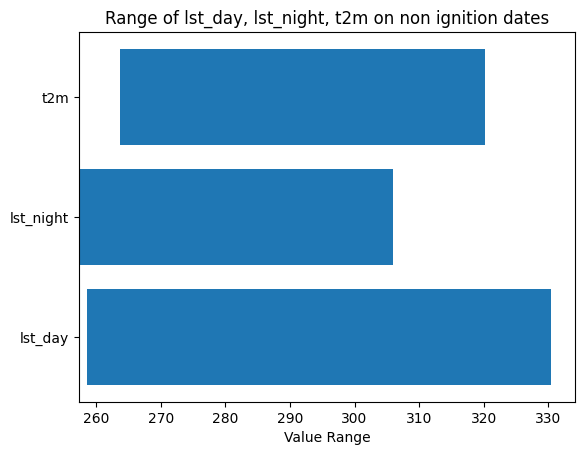

In [50]:
# Range (Min & Max) berechnen
lst_day_min, lst_day_max = non_ignition_dates['lst_day'].min(), non_ignition_dates['lst_day'].max()
lst_night_min, lst_night_max = non_ignition_dates['lst_night'].min(), non_ignition_dates['lst_night'].max()
t2m_min, t2m_max = non_ignition_dates['t2m'].min(), non_ignition_dates['t2m'].max()

# Plot vorbereiten
variables = ['lst_day', 'lst_night', 't2m']
mins = [lst_day_min, lst_night_min, t2m_min]
maxs = [lst_day_max, lst_night_max, t2m_max]
ranges = [max_val - min_val for min_val, max_val in zip(mins, maxs)]

# Balken horizontal zeichnen
plt.barh(variables, ranges, left=mins)

# Achsen beschriften
plt.xlabel('Value Range')
plt.title('Range of lst_day, lst_night, t2m on non ignition dates')

plt.show()

In [47]:
nan_counts_lst_day_no = non_ignition_dates['lst_day'].isna().sum()
nan_counts_lst_night_no = non_ignition_dates['lst_night'].isna().sum()
nan_counts_t2m_no = non_ignition_dates['t2m'].isna().sum()

Vergleich der NaN-Werte in lst_day, lst_night und t2m zwischen den Zünddaten und den Nicht-Zünddaten

In [43]:
no_ignition_lst_day_percentage, no_ignition_lst_night_percentage, no_ignition_t2m_percentage = nan_counts_lst_day_no/sum_non_ignition, nan_counts_lst_night_no/sum_non_ignition, nan_counts_t2m_no/sum_non_ignition

In [50]:
ignition_lst_day_percentage, ignition_lst_night_percentage, ignition_t2m_percentage = nan_counts_lst_day/sum_ignition, nan_counts_lst_night/sum_ignition, nan_counts_t2m/sum_ignition
print ("Comparison of NaN values in lst_day, lst_night and t2m between ignition dates and non-ignition dates")
print (f"lst_day: {ignition_lst_day_percentage:.2%} vs {no_ignition_lst_day_percentage:.2%}")
print (f"lst_night: {ignition_lst_night_percentage:.2%} vs {no_ignition_lst_night_percentage:.2%}")
print (f"t2m: {ignition_t2m_percentage:.2%} vs {no_ignition_t2m_percentage:.2%}")

Comparison of NaN values in lst_day, lst_night and t2m between ignition dates and non-ignition dates
lst_day: 22.38% vs 19.09%
lst_night: 29.40% vs 25.19%
t2m: 0.00% vs 0.00%
